In [1]:
#Kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [5]:
!pip install nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\talha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#Veri setimizi okuyalım 
data_set = pd.read_csv("dataSet.txt",sep=";",names=["Text","Emotions"])

In [7]:
#Veri setine bir bakış
data_set.head()

,Text,Emotions
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [8]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      20000 non-null  object
 1   Emotions  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [9]:
data_set['Emotions'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotions, dtype: int64

In [10]:
a=data_set['Emotions'].value_counts()

In [11]:
labels=["joy","sadness","anger","fear","love","surprise"]

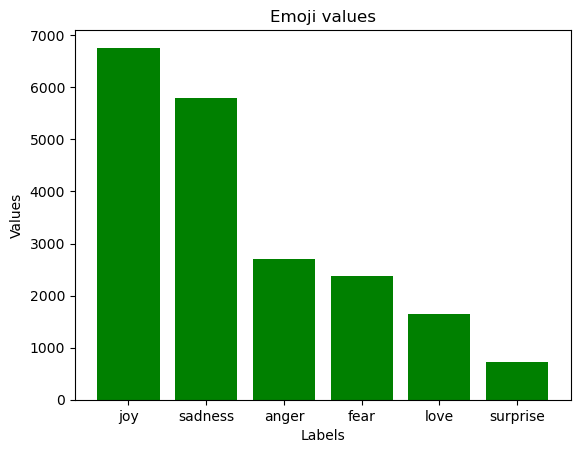

In [12]:
colors=['blue','red']
plt.bar(labels, a , color='green')
# Grafiği başlıklar ve etiketler ekleyin
plt.title('Emoji values')
plt.xlabel('Labels')
plt.ylabel('Values')
# Grafiği gösterin
plt.show()

In [13]:
data_set['Text']

0        im feeling rather rotten so im not very ambiti...
1                im updating my blog because i feel shitty
2        i never make her separate from me because i do...
3        i left with my bouquet of red and yellow tulip...
4          i was feeling a little vain when i did this one
                               ...                        
19995    im having ssa examination tomorrow in the morn...
19996    i constantly worry about their fight against n...
19997    i feel its important to share this info for th...
19998    i truly feel that if you are passionate enough...
19999    i feel like i just wanna buy any cute make up ...
Name: Text, Length: 20000, dtype: object

In [14]:
#Data process İşlemleri

In [15]:
#Tüm metni küçük harfe çevirme
data_set['Text']=data_set['Text'].apply(lambda x: ' '.join(x.lower() for x in x.split() ))
data_set['Emotions']=data_set['Emotions'].apply(lambda x: ' '.join(x.lower() for x in x.split() ))
data_set.head(7)

,Text,Emotions
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
5,i cant walk into a shop anywhere where i do no...,fear
6,i felt anger when at the end of a telephone call,anger


In [16]:
#Noktalama işaretlerinin kaldırılması
data_set['Emotions']=data_set['Emotions'].str.replace("[^\w\s]","")
data_set['Text']=data_set['Text'].str.replace("[^\w\s]","")

C:\Users\talha\AppData\Local\Temp\ipykernel_14900\65964030.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_set['Emotions']=data_set['Emotions'].str.replace("[^\w\s]","")
C:\Users\talha\AppData\Local\Temp\ipykernel_14900\65964030.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_set['Text']=data_set['Text'].str.replace("[^\w\s]","")


In [17]:
#Metinde bulunan sayıların silinmesi
data_set['Text'] = data_set['Text'].str.replace('\d',"")

C:\Users\talha\AppData\Local\Temp\ipykernel_14900\2360360123.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_set['Text'] = data_set['Text'].str.replace('\d',"")


In [18]:
#StopWordsler
sw = stopwords.words('english')
#StopWordslerin Temizlenmesi
data_set['Text']= data_set['Text'].apply(lambda x: ' '.join(x for x in x.split() if x not in sw))

In [19]:
data_set.head(7)

,Text,Emotions
0,im feeling rather rotten im ambitious right,sadness
1,im updating blog feel shitty,sadness
2,never make separate ever want feel like ashamed,sadness
3,left bouquet red yellow tulips arm feeling sli...,joy
4,feeling little vain one,sadness
5,cant walk shop anywhere feel uncomfortable,fear
6,felt anger end telephone call,anger


In [20]:
#Az geçen kelimelerin tespiti
az_gecen = pd.Series(" ".join(data_set['Text']).split()).value_counts()

In [21]:
az_gecen

feel         13938
feeling       6431
like          3616
im            3055
really        1182
             ...  
wrestle          1
pinning          1
nanashi          1
pyongyang        1
ssa              1
Length: 16947, dtype: int64

In [22]:
az_gecen = pd.Series(" ".join(data_set['Text']).split()).value_counts()[-10000:]

In [23]:
az_gecen

dominican    2
daunting     2
tickles      2
proceed      2
soulmate     2
            ..
wrestle      1
pinning      1
nanashi      1
pyongyang    1
ssa          1
Length: 10000, dtype: int64

In [24]:
#Az geçen kelimelerin temizlenmesi
data_set['Text'] = data_set['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in az_gecen))

In [25]:
pd.Series(" ".join(data_set['Text']).split()).value_counts()

feel       13938
feeling     6431
like        3616
im          3055
really      1182
           ...  
wishful        2
crotch         2
wired          2
jean           2
fetched        2
Length: 6947, dtype: int64

In [26]:
!pip install textblob

In [27]:
#Lemmatization İşlemleri
from textblob import Word
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\talha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
data_set['Text'] = data_set['Text'].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))

In [29]:
#Veri setini bölme işlemi
X_train, X_test , y_train , y_test= train_test_split(data_set['Text'],data_set['Emotions'],test_size=0.33,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(13400,)
(6600,)
(13400,)


In [30]:
#Özellik Çıkarım Yöntemleri

# Count Vectors
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [31]:
x_train_count= vectorizer.transform(X_train)
x_test_count = vectorizer.transform(X_test)

In [32]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# TF-IDF Yöntemleri
# 1-WordLevel
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer()

In [35]:
x_train_tfidf_wordlevel = tf_idf_word_vectorizer.transform(X_train)
x_test_tfidf_wordlevel = tf_idf_word_vectorizer.transform(X_test)

In [36]:
# 2-NGRAMLevel
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(2, 3))

In [37]:
x_train_tfidf_ngram = tf_idf_ngram_vectorizer.transform(X_train)
x_test_tfidf_ngram = tf_idf_ngram_vectorizer.transform(X_test)

In [38]:
#Naive Bayes Algoritmasının Uygulanması
from sklearn.model_selection import cross_val_score

In [39]:
nb_model = MultinomialNB().fit(x_train_count,y_train)
accuracy = cross_val_score(nb_model,x_test_count,y_test,cv=10).mean()
print("Count Vectors Doğrulanmış Accuracy:",accuracy)

Count Vectors Doğrulanmış Accuracy: 0.7557575757575759


In [40]:
nb_model = MultinomialNB().fit(x_train_tfidf_wordlevel,y_train)
accuracy = cross_val_score(nb_model,x_test_tfidf_wordlevel,y_test,cv=10).mean()
print("Word-Level Doğrulanmış Accuracy:",accuracy)

Word-Level Doğrulanmış Accuracy: 0.6478787878787877


In [41]:
nb_model = MultinomialNB().fit(x_train_tfidf_wordlevel,y_train)
accuracy = cross_val_score(nb_model,x_test_tfidf_ngram,y_test,cv=10).mean()
print("N_GRAM Doğrulanmış Accuracy:",accuracy)

N_GRAM Doğrulanmış Accuracy: 0.5637878787878787


In [42]:
command = (["Are you serious?",                            #surprise
            "Get out of the room and never come back.",    #anger
            "Everything's been great since he came.",      #joy
            "I had a bad exam, I want to be alone today.", #sadness
            "I'm so mad at you."])                         #anger

In [43]:
vector = CountVectorizer()
vector.fit(X_train)
command = vector.transform(command)

In [44]:
nb_model.predict(command)

array(['joy', 'joy', 'joy', 'sadness', 'anger'], dtype='<U8')